In [1]:
import numpy as np
import seaborn as sns
sns.set_style("white")
from collections import Counter
import giddy
import mapclassify as mc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import libpysal
from scipy.stats import mode

In [2]:
df = pd.read_csv('per_week.csv')
c = np.array(df.iloc[:,3:])
df

,Lat,Long,Region,31/03/20,07/04/20,15/04/20,22/04/20,30/04/20,07/05/20,15/05/20,...,22/06/20,30/06/20,07/07/20,15/07/20,22/07/20,31/07/30,07/08/20,15/08/20,22/08/20,30/08/20
0,"-21,50216466","45,20566584",Androy,1,1,1,1,1,1,1,...,1,1,1,1,1,3,1,3,1,3
1,"-25,0333332","46,9833294",Anôsy,1,1,1,1,2,1,1,...,1,1,1,1,3,3,3,3,2,2
2,"-23,35","43,66667",Atsimo_Andrefana,1,2,1,1,2,1,1,...,1,1,1,3,3,3,3,3,2,3
3,"-22,40293","46,12576",Ihorombe,1,1,1,1,1,1,1,...,1,1,1,2,1,2,3,1,3,3
4,"-20,28416553","44,31716538",Menabe,1,1,1,1,1,1,1,...,1,1,2,1,2,1,3,3,3,3
5,"-17,166666","49,2999988",Analanjirofo,1,1,2,1,1,1,1,...,3,3,2,3,3,3,2,1,1,1
6,"-12,2666656","49,2833322",Diana,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,3,3,3
7,"-14,8833298","50,2833322",Sava,1,1,1,1,1,1,1,...,1,2,1,2,1,3,3,3,3,3
8,"-14,87239818","47,9833994",Sofia,1,1,1,1,1,1,1,...,1,1,1,2,2,3,3,3,3,3
9,"-15,71667","46,31667",Boeny,1,1,1,1,1,1,1,...,1,2,2,2,3,3,3,3,2,2


# Matrice Markov

In [3]:
class Markov(object):
    def __init__(self, class_ids):
        self.classes = np.unique(class_ids)
        class_ids = np.array(class_ids)
        n, t = class_ids.shape
        k = len(self.classes)
        self.k = k
        js = list(range(t - 1))

        classIds = self.classes.tolist()
        transitions = np.zeros((k, k))
        for state_0 in js:
            state_1 = state_0 + 1
            state_0 = class_ids[:, state_0]
            state_1 = class_ids[:, state_1]
            initial = np.unique(state_0)
            for i in initial:
                ending = state_1[state_0 == i]
                uending = np.unique(ending)
                row = classIds.index(i)
                for j in uending:
                    col = classIds.index(j)
                    transitions[row, col] += sum(ending == j)
        self.transitions = transitions
        row_sum = transitions.sum(axis=1)
        self.p = np.dot(np.diag(1 / (row_sum + (row_sum == 0))), transitions)

In [4]:
M1 = Markov(c)
M1.transitions
M1.p

array([[0.83011583, 0.11196911, 0.05791506],
       [0.23076923, 0.53846154, 0.23076923],
       [0.06666667, 0.2       , 0.73333333]])

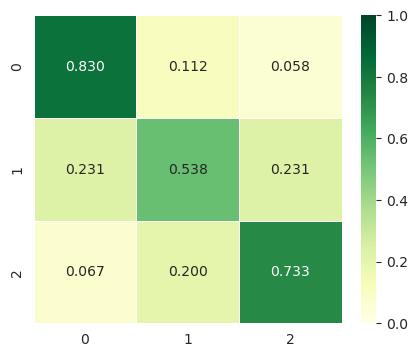

In [5]:
fig, ax1 = plt.subplots(figsize = (5,4))
im = sns.heatmap(M1.p, annot=True, linewidths=.4, ax=ax1, cbar=True, vmin=0, vmax=1,square=True,  cmap="YlGn",fmt='.3f')
#plt.savefig('global.jpg',dpi=400)

# Chaîne inclus semi-markov

In [6]:
class Semi_Markov(object):
    def __init__(self, class_ids):
        self.classes = np.unique(class_ids)
        class_ids = np.array(class_ids)
        n, t = class_ids.shape
        k = len(self.classes)
        self.k = k
        js = list(range(t - 1))

        classIds = self.classes.tolist()
        transitions = np.zeros((k, k))
        for state_0 in js:
            state_1 = state_0 + 1
            state_0 = class_ids[:, state_0]
            state_1 = class_ids[:, state_1]
            initial = np.unique(state_0)
            for i in initial:
                ending = state_1[state_0 == i]
                uending = np.unique(ending)
                row = classIds.index(i)
                for j in uending:
                    if i !=j:
                        col = classIds.index(j)
                        transitions[row, col] += sum(ending == j)
        self.transitions = transitions
        row_sum = transitions.sum(axis=1)
        self.p = np.dot(np.diag(1 / (row_sum + (row_sum == 0))), transitions)

In [7]:
M1 = Semi_Markov(c)
M1.transitions
M1.p
np.round(M1.p,2)

array([[0.  , 0.66, 0.34],
       [0.5 , 0.  , 0.5 ],
       [0.25, 0.75, 0.  ]])

# Markov spatialisé

In [8]:
w = libpysal.io.open('k3.gal').read()
w.full()
W = w.full()[0]

In [9]:
classes = np.unique(c)
k = len(classes)
class_ids = (c-1)

In [10]:
lclass_ids = libpysal.weights.lag_categorical(w, c,ties = 'tryself')

In [73]:
for j in range(22):
    for i in range(21):
        lclass_ids[j,i]=np.array(np.around(np.average(c[:,i], weights=W[j,:])),dtype='int8')

In [11]:
for j in range(22):    
    for i in range(21):
        if max(c[:,i]*W[j,:])==3:
            lclass_ids[j,i]=3
        elif max(c[:,i]*W[j,:])==2:
            lclass_ids[j,i]=2
        elif max(c[:,i]*W[j,:])==1:
            lclass_ids[j,i]=1

In [12]:
lclass_ids = lclass_ids-1
lclass_ids

array([[0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2],
       [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,

In [13]:
k = len(classes)
n, t = c.shape
T = np.zeros((k, k, k))

In [14]:
k = len(classes)
n, t = c.shape
T = np.zeros((k, k, k))
for t1 in range(t-1):
    t2 = t1 + 1
    for i in range(n):
        T[lclass_ids[i, t1], class_ids[i, t1], class_ids[i, t2]] += 1

P = np.zeros_like(T)

In [15]:
np.fill_diagonal(T[0],0)
np.fill_diagonal(T[1],0)
np.fill_diagonal(T[2],0)
T

array([[[ 0.,  8.,  2.],
        [ 6.,  0.,  1.],
        [ 1.,  1.,  0.]],

       [[ 0., 15.,  3.],
        [ 8.,  0.,  7.],
        [ 1.,  2.,  0.]],

       [[ 0.,  6., 10.],
        [ 7.,  0., 13.],
        [ 4., 15.,  0.]]])

In [16]:
for i, mat in enumerate(T):
    row_sum = mat.sum(axis=1)
    row_sum = row_sum + (row_sum == 0)
    p_i = np.array(np.diag(1.0 / row_sum)).dot(np.array(mat))
    P[i] = p_i

Text(0.5, 1.0, 'Spatial Conditional High')

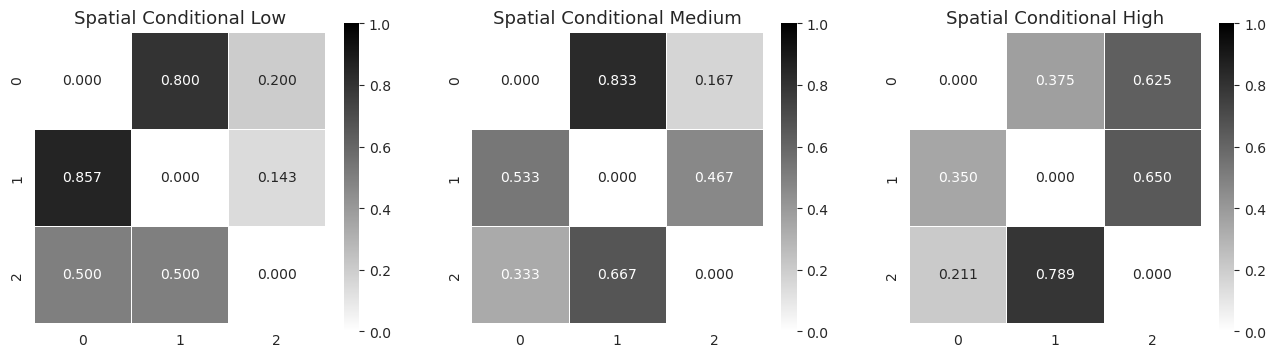

In [17]:
fig, axes = plt.subplots(1,3,figsize = (16,4))

ax = axes[0]
im = sns.heatmap(P[0], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional Low",fontsize=13)

ax = axes[1]
im = sns.heatmap(P[1], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional Medium",fontsize=13)

ax = axes[2]
im = sns.heatmap(P[2], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional High",fontsize=13)

#plt.savefig('spatiale.pdf')
#plt.savefig('spatiale.jpg',dpi=500)

# Matrice bayesienne

In [18]:
P = np.zeros((3, 3, 3))
P[0] = np.array([[0,0.73,0.27],[0.75,0,0.25],[0.5,0.5,0]])
P[1] = np.array([[0,0.7859,0.2141],[0.5277134,0,0.4722866],[0.4184965,0.5815035,0]])
P[2] = np.array([[0,0.3956,0.6044],[0.36983,0,0.63017],[0.2555689,0.7444311,0]])
P

array([[[0.       , 0.73     , 0.27     ],
        [0.75     , 0.       , 0.25     ],
        [0.5      , 0.5      , 0.       ]],

       [[0.       , 0.7859   , 0.2141   ],
        [0.5277134, 0.       , 0.4722866],
        [0.4184965, 0.5815035, 0.       ]],

       [[0.       , 0.3956   , 0.6044   ],
        [0.36983  , 0.       , 0.63017  ],
        [0.2555689, 0.7444311, 0.       ]]])

Text(0.5, 1.0, 'Spatial Conditional High')

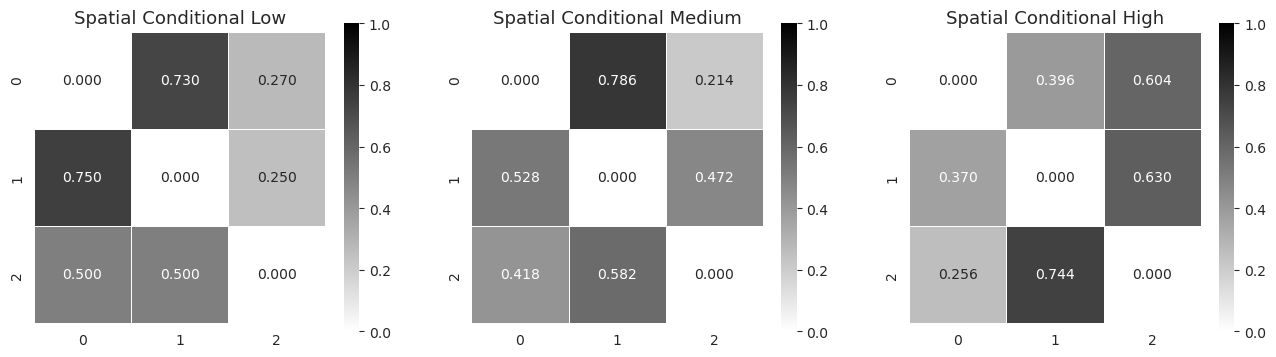

In [19]:
fig, axes = plt.subplots(1,3,figsize = (16,4))

ax = axes[0]
im = sns.heatmap(P[0], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional Low",fontsize=13)

ax = axes[1]
im = sns.heatmap(P[1], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional Medium",fontsize=13)

ax = axes[2]
im = sns.heatmap(P[2], annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,square=True, cmap="binary",fmt='.3f')
ax.set_title("Spatial Conditional High",fontsize=13)

#plt.savefig('spatiale.pdf')
#plt.savefig('spatiale.jpg',dpi=500)

# Temps de séjour

In [20]:
def sejourn_time(space,k,espace,state0,state1) :
    row,col = k.shape
    sejour=list()
    for l in range(row):
        j=0
        for i in range(col):
            if space[l,i] == espace:
                if k[l,i]==state0:
                    j+=1
                elif k[l,i]!=state0:
                    if j!=0:
                        sejour.append(j)
                    j=0       
                else:
                    j=0
    return sejour

In [21]:
sejour = sejourn_time(space=lclass_ids,k=c,espace=1,state0=1,state1 =1)

In [22]:
sejour

[1, 5, 2, 1, 3, 4, 2, 2, 1, 8, 8, 9, 5, 2, 5, 5, 5, 1]

3.8333333333333335

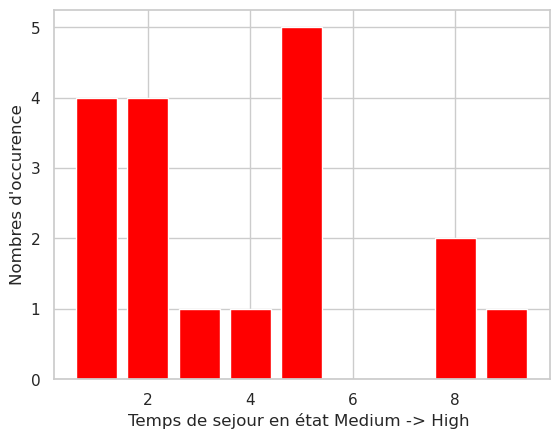

In [23]:
table = Counter(sejour)
sns.set(style="whitegrid")
plt.bar(table.keys(), table.values(),color="red")
plt.ylabel('Nombres d\'occurence')
plt.xlabel("Temps de sejour en état Medium -> High ")
#plt.savefig('med-high.jpg',dpi=200)
np.mean(sejour)

# Chaine semi-markov spatial

In [24]:
print(np.unique(c))
n,t = c.shape
k = len(np.unique(c))
print(n,t)
print(k)
js = list(range(t - 1))
classIds=np.unique(c).tolist()
js[0]

[1 2 3]
22 21
3


0

In [25]:
transitions = np.zeros((k, k))
for state_0 in js:
    state_1 = state_0 + 1
    state_0 = c[:, state_0]
    state_1 = c[:, state_1]
    initial = np.unique(state_0)
    for i in initial:
        ending = state_1[state_0 == i]
        uending = np.unique(ending)
        row = classIds.index(i)
        for j in uending:
            if i !=j:
                col = classIds.index(j)
                transitions[row, col] += sum(ending == j)
row_sum = transitions.sum(axis=1)
Q = np.dot(np.diag(1 / (row_sum + (row_sum == 0))), transitions)
Q

array([[0.        , 0.65909091, 0.34090909],
       [0.5       , 0.        , 0.5       ],
       [0.25      , 0.75      , 0.        ]])

# Simulation chaine semi-markovien 

In [28]:
def Sejour(x,y):
    sejour = np.array([[0,np.random.poisson(5.02,size=1)[0],np.random.geometric(p=0.16,size=1)[0]],
          [np.random.geometric(p=0.654,size=1)[0],0,np.random.geometric(p=0.444,size=1)[0]],
          [np.random.geometric(p=0.62,size=1)[0],np.random.geometric(p=0.33,size=1)[0],0]])
    return(sejour[x,y])

In [61]:
Q = P[0]
Q

array([[0.91666667, 0.06666667, 0.01666667],
       [0.35294118, 0.58823529, 0.05882353],
       [0.33333333, 0.33333333, 0.33333333]])

In [62]:
horizon = 10000
simul = [1]

In [63]:
for i in range(0,horizon):
    etat = np.random.choice(size=1,a=[0,1,2],p=Q[simul[-1]])[0]
    for j in range(Sejour(simul[-1],etat)):
        simul.append(simul[-1])
    simul.append(etat)

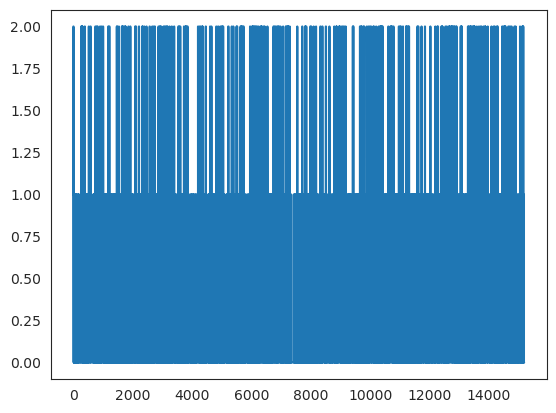

In [64]:
plt.step(range(len(simul)),simul)

# Temps de retour et excursion

In [65]:
abs_time = list()
j=0
for l in range(1,len(simul)):
    if simul[l] != 0 :
        j+=1
    elif simul[l] == 0 :
        if j!=0:
            abs_time.append(j)
        j=0
    else :
        j=0

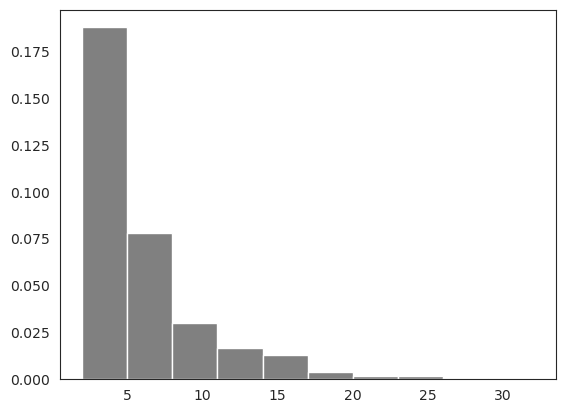

In [66]:
k = np.linspace(1,40,40)
plt.hist(abs_time,bins=10, density=True,color='gray')
#plt.plot(k,expo(k),color="red",label="Geometric law")
plt.savefig('high_low.jpg',dpi=400)

In [52]:
q = len(abs_time)/sum(abs_time)
q

0.05084138918725385

In [49]:
q = len(abs_time)/sum(abs_time)
def expo(k):
    p = q
    return((1-p)**(k-1)*p)

In [67]:
sum(abs_time)/len(abs_time)

5.450301204819277